In [4]:
import pandas as pd
from Models.GlassBox.figs.figs_class import FIGS_class
%reload_ext autoreload
%autoreload 2

In [5]:
FIGS_parameter = dict(
    max_rules= [5,10,15,20,25],
    max_trees=[2,3,4,5,6,7,8,9,10],
    min_impurity_decrease=[0.1, 0.2, 0.3],
)
gridsearch_parameters = dict(
    path="./../../../outputs/scores/",
    name="0",
    nDCG_at=15
)

# Grid-search

In [6]:
gs = FIGS_class(**gridsearch_parameters)

In [7]:
best_ = gs.grid_search(FIGS_parameter)
gs.save_model(best_[0], name="FIGSReg")

Finding the best model: 100%|██████████| 135/135 [02:32<00:00,  1.13s/it, nDCG=0.985]


# Metric evalutation

In [8]:
best_model = gs.load_model(name="./saved_models/FIGSReg")

In [9]:
# nDCG on test-set
nDCG_train = gs.eval_model(model=best_model, df=gs.train, nDCG_at=[1,10,15])
nDCG_valid = gs.eval_model(model=best_model, df=gs.valid, nDCG_at=[1,10,15])
nDCG_test = gs.eval_model(model=best_model, df=gs.test, nDCG_at=[1,10,15])

display(pd.DataFrame([nDCG_train,nDCG_valid,nDCG_test],index=["Training","Validation","Test"]))

,nDCG@1,nDCG@10,nDCG@15
Training,0.9452,0.9648,0.9710
Validation,0.9516,0.9783,0.9849
Test,0.9421,0.9683,0.9764


In [10]:
print(best_model)

> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree.
> 	For classifiers, a sigmoid function is then applied to the sum.
> ------------------------------
fitness_know_basic <= 0.179 (Tree #0 root)
	fitness_edu_basic <= 0.500 (split)
		Val: 21.041 (leaf)
		Val: 29.750 (leaf)
	fit_expertize <= 0.407 (split)
		fitness_know_basic <= 0.837 (split)
			fit_expertize <= 0.073 (split)
				fitness_know_basic <= 0.542 (split)
					Val: 44.608 (leaf)
					Val: 47.483 (leaf)
				Val: 51.155 (leaf)
			fit_expertize <= 0.102 (split)
				Val: 51.257 (leaf)
				Val: 56.227 (leaf)
		fit_expertize <= 0.939 (split)
			fitness_know_basic <= 0.847 (split)
				Val: 59.216 (leaf)
				fit_expertize <= 0.631 (split)
					Val: 62.219 (leaf)
					Val: 66.209 (leaf)
			fit_expertize <= 1.128 (split)
				Val: 70.159 (leaf)
				Val: 78.138 (leaf)

	+
fitness_comp_basic <= 1.032 (Tree #1 root)
	fitness_comp_basic <= 0

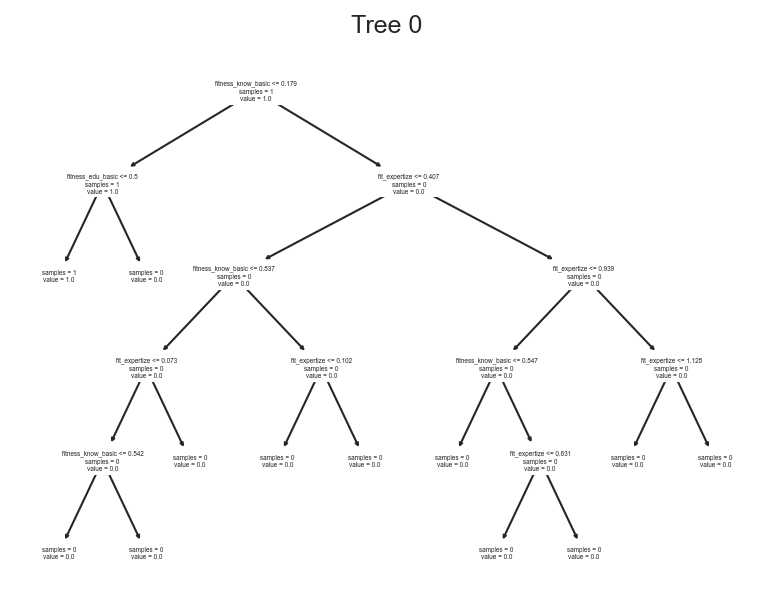

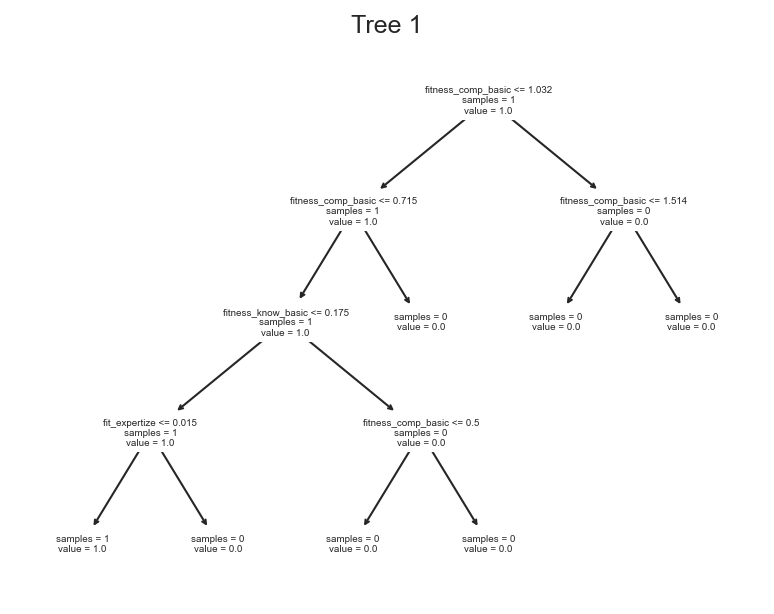

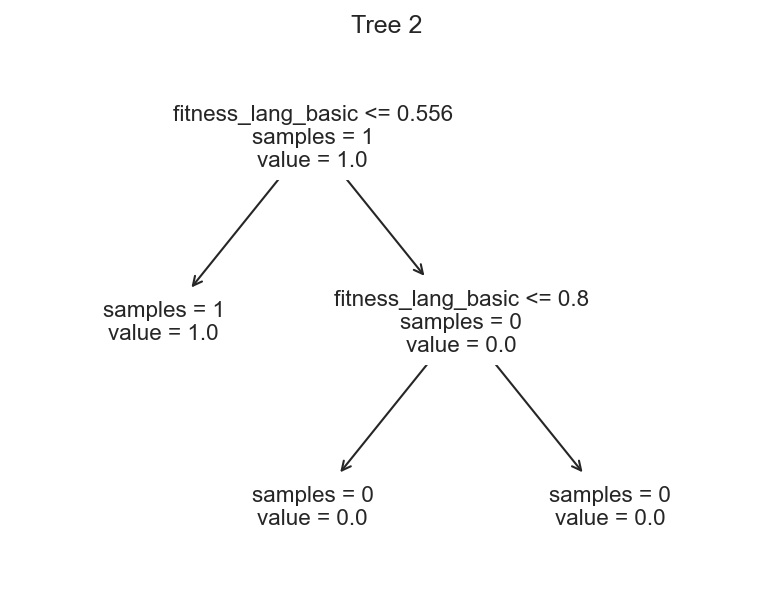

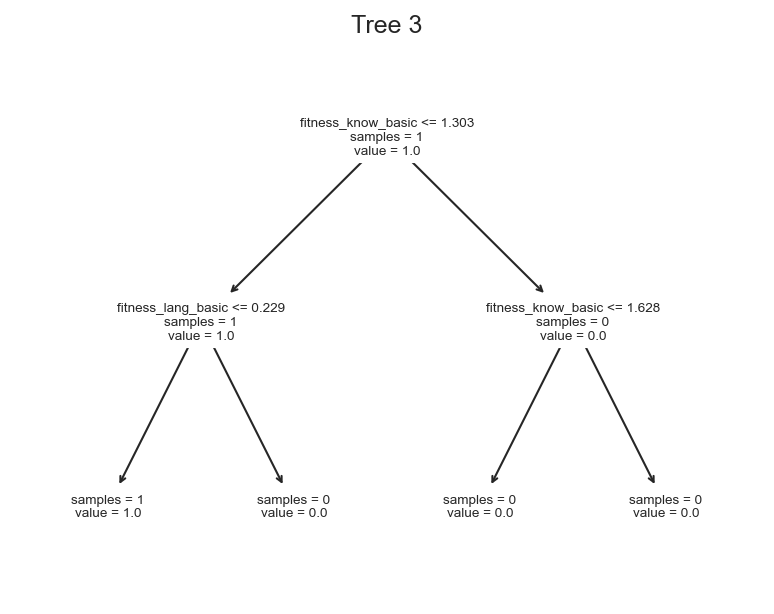

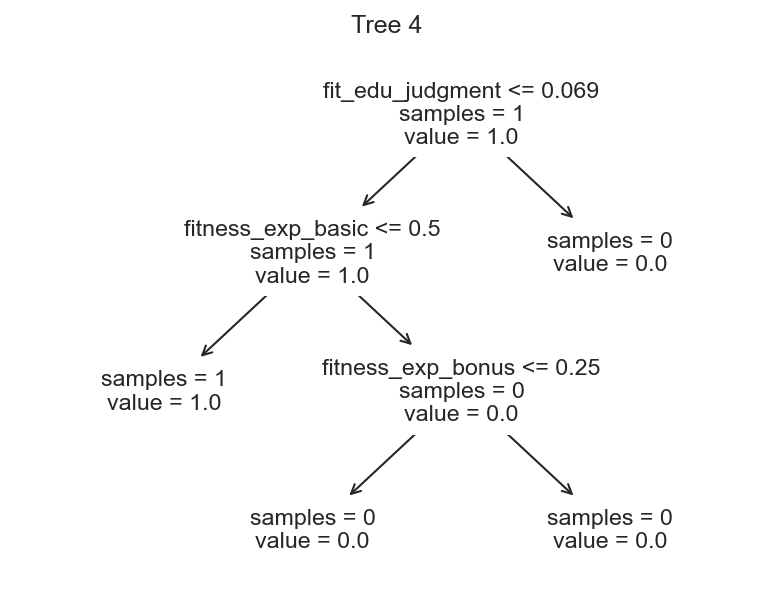

In [11]:
for i in range(len(best_model.trees_)):
    best_model.plot(tree_number=i)